In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
colors2 = ['#003DA6', '#B53A6D']
colors3 = ['#003DA6', '#B53A6D', '#7AC4A5']
colors4 = ['#003DA6', '#B53A6D', '#7AC4A5', '#F17F4C']
colors5 = ['#0B1F41', '#003DA6', '#B53A6D', '#7AC4A5', '#F17F4C']

#Phishing

We are interested in the probability that at least one person will click and message and nobody (human or machine) will flag one as malicious.

That probability depends on how many messages are sent in the phishing campaign.

In [ ]:
#Varibles and their settings
labels = ['No AI', 'Human-Level Phish Writer', 'Detector Half as Effective as Generator']
#colors = ['#003DA6', '#B53A6D', '#7AC4A5']
p_click = [0.03, 0.3, 0.3]
p_alertComputer = [0.01, 0.01, 0.25]
p_alertHuman = [0.015, 0.005, 0.005]

#Create a combined alert probability for either humans or machines
p_alert = []
for i in range(len(p_click)):
  p_alert.append(p_alertComputer[i] + p_alertHuman[i] - p_alertComputer[i]*p_alertHuman[i])
  #Gots to subtract the union of both. Think Venn diagrams

In [ ]:
N = np.arange(200) #N is the number of phising messages sent

#Capital P's are for organization-level stats rather than individual message stats which get lower-case p's
P_infection, P_noAlert = [],[]
for i in range(len(p_click)):
  P_infection.append(1 - ((1-p_click[i])**N)) # 1 minus the probability that nobody clicks it
  P_noAlert.append((1-p_alert[i])**N)

In [ ]:
#Probably you're infected and didn't get warned is the probability of both.
P_stealthInfection = []
for i in range(len(p_click)):
  P_stealthInfection.append(P_infection[i] * P_noAlert[i])

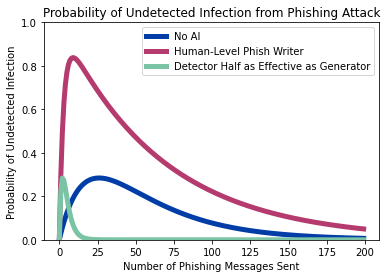

In [ ]:
plt.ylim([0,1])
plt.title('Probability of Undetected Infection from Phishing Attack')
plt.xlabel('Number of Phishing Messages Sent')
plt.ylabel('Probability of Undetected Infection')
for i in range(len(p_click)):
  plt.plot(P_stealthInfection[i], label=labels[i], color=colors3[i], linewidth=5)
plt.legend()

In [ ]:
#Find the maximum values for each configuration
for i in range(len(p_click)):
  print(np.argmax(P_stealthInfection[i]), np.max(P_stealthInfection[i]))

26 0.2843621557555541
9 0.8379839745825634
2 0.28401342187499995


#Vulnerability Discovery







In [ ]:
labels = ['Basic computer approach', 'Collection of humans', '10x faster than humans', '10x \"smarter\" than humans']
#colors = ['#003DA6', '#B53A6D', '#7AC4A5', '#F17F4C']
alphas = [3, 0.4, 0.4, 0.04]
Cs = [85.5, 6, 6, 6]
nus = [1, 1, 10, 1]

In [ ]:
def VulnDiscRate(Cn,nu,alpha,T):
  return Cn * (nu**(1-alpha)) * T**(-1*alpha)

In [ ]:
#Use the distribution and integral for number of attempts then substitute in N=(nu)*T
#def NumVulnsByNum(Cn,nu,T1,T2): 
#  coeff = (Cn * (nu**(1-alpha))) / (1-alpha)
#  S = coeff * ((T2**(1-alpha)) - (T1**(1-alpha)))
#  return(S) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


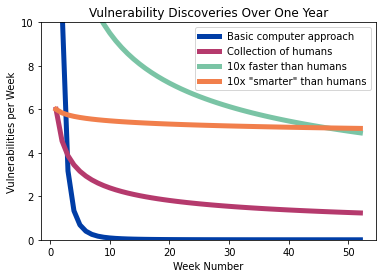

In [ ]:
times = np.linspace(0,52,53) #Use weekly rates to calculate over one year
for i in range(len(labels)):
  rates = [VulnDiscRate(Cs[i],nus[i],alphas[i],time) for time in times]

  plt.plot(times,rates, label=labels[i], linewidth=5, color=colors4[i])
plt.legend()
plt.ylim([0,10])
plt.ylabel('Vulnerabilities per Week')
plt.xlabel('Week Number')
plt.title('Vulnerability Discoveries Over One Year')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


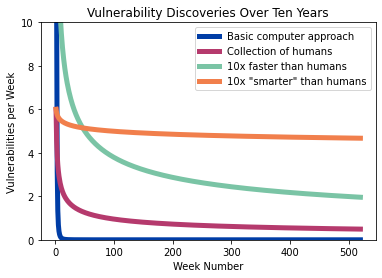

In [ ]:
times = np.linspace(0,10*52,10*52+1) #Repeat it for 10 years
for i in range(len(labels)):
  rates = [VulnDiscRate(Cs[i],nus[i],alphas[i],time) for time in times]

  plt.plot(times,rates, label=labels[i], linewidth=5, color=colors4[i])
plt.legend()
plt.ylim([0,10])
plt.ylabel('Vulnerabilities per Week')
plt.xlabel('Week Number')
plt.title('Vulnerability Discoveries Over Ten Years')
plt.show()

#Patching vs Exploitation

#Extracted Data for time to patch development

About 78.8% of CVEs were already patched when they were disclosed according to https://dl.acm.org/doi/10.1145/3133956.3134072

The remaining 21.2% follow the following behavior. (Data pulled as carefully as possible from their Figure 9)

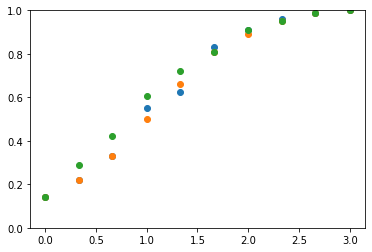

In [ ]:
log_dates = [0,0.33,0.66,1,1.33,1.66,2,2.33,2.66,3]
dates = [10**val for val in log_dates]
cum_patch_dev_low = [0.14,0.22,0.33,0.55,0.625,0.83,0.91,0.96,0.99,1]
cum_patch_dev_med = [0.14,0.22,0.33,0.50,0.66,0.81,0.89,0.95,0.99,1]
cum_patch_dev_high = [0.14,0.29,0.42,0.605,0.72,0.81,0.91,0.95,0.99,1]

plt.plot(log_dates, cum_patch_dev_low,'o')
plt.plot(log_dates, cum_patch_dev_med,'o')
plt.plot(log_dates, cum_patch_dev_high,'o')
plt.ylim([0,1])
plt.show()

Fit the extracted data from the paper to a Weibull distribution

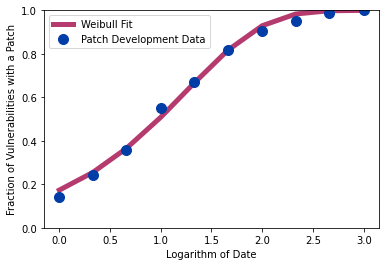

In [ ]:
def cum_weibull(t,k,lam):
  return 1-np.exp(-1*(t/lam)**k)

avg_cum_patch = [(cum_patch_dev_low[i]+cum_patch_dev_med[i]+cum_patch_dev_high[i])/3 for i in range(len(cum_patch_dev_low))]
no_patch_dev_frac = [1-val for val in avg_cum_patch]

no_dev_params,_ = curve_fit(cum_weibull,dates,avg_cum_patch)
fit_no_patch_dev = [cum_weibull(val,no_dev_params[0],no_dev_params[1]) for val in dates]

plt.plot(np.log10(dates),fit_no_patch_dev,'-', linewidth=5, color=colors2[1], label='Weibull Fit')
plt.plot(np.log10(dates),avg_cum_patch,'o', markersize=10, color=colors2[0], label='Patch Development Data')
plt.ylim([0,1])
plt.legend()
plt.xlabel('Logarithm of Date')
plt.ylabel('Fraction of Vulnerabilities with a Patch')
plt.show()

In [ ]:
print(no_dev_params)

[ 0.57192565 18.19400281]


Show the same thing on a linear x-axis instead of logarithmic (Cut off after one year)

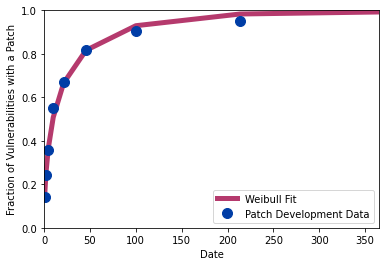

In [ ]:
plt.plot(dates,fit_no_patch_dev,'-', linewidth=5, color=colors2[1], label='Weibull Fit')
plt.plot(dates,avg_cum_patch,'o', markersize=10, color=colors2[0], label='Patch Development Data')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.xlabel('Date')
plt.ylabel('Fraction of Vulnerabilities with a Patch')
plt.xlim([0,365])
plt.show()

See what it looks like with 78.8% as the t=0 intercept. This is what it would look like if we also considered the 78.8% of vulns that have patches before they're disclosed.

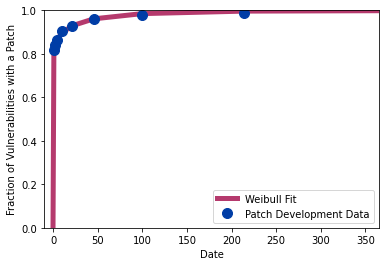

In [ ]:
fit_no_patch_dev_with_intercept = [0.788 + 0.212*val for val in fit_no_patch_dev]
fit_no_patch_dev_with_intercept.insert(0,0)
avg_cum_patch_with_intercept = [0.788 + 0.212*val for val in avg_cum_patch]
dates_with_zero = dates.copy()
dates_with_zero.insert(0,0)

plt.plot(dates_with_zero,fit_no_patch_dev_with_intercept,'-', linewidth=5, color=colors2[1], label='Weibull Fit')
plt.plot(dates,avg_cum_patch_with_intercept,'o', markersize=10, color=colors2[0], label='Patch Development Data')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.xlabel('Date')
plt.ylabel('Fraction of Vulnerabilities with a Patch')
plt.xlim([-10,365])
plt.show()

#Patch Deployment

Once a patch exists, adoption apparently follows an exponential decay

In [ ]:
ts = np.linspace(0,365,101)

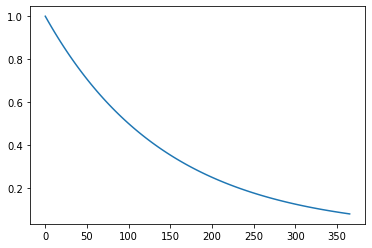

In [ ]:
A,B = 1,(-1*np.log(0.5)/100) #54% of software had median patch delay of 100 days or less: https://ieeexplore.ieee.org/document/7163055 (2015)
unpatched_fraction = [A*np.exp(-B*t) for t in ts]
plt.plot(ts,unpatched_fraction)
plt.show()

In [ ]:
-100/np.log(0.5) #Get the parameter value

144.26950408889635

Combining the patch development and the patch deployment is the addition of two random variables. That can be found by convolution of the probability distribution functions which we do numerically here.

In [ ]:
import scipy.stats as stats
import scipy.signal as signal

In [ ]:
delta = 1e-1 #Step size is one tenth of a day
big_grid_max = 1000 #Grid size is 1000 days
big_grid = np.arange(delta,big_grid_max,delta) #make sure grid is big enough to really get to 0 in the tails.

weibull = stats.weibull_min(c=0.572, scale=18.2) #Parameters extracted above
pdf_weibull = 18.2*weibull.pdf(big_grid)
pmf_weibull = weibull.pdf(big_grid)*delta
cdf = weibull.cdf(big_grid)

beta_for_patch_dev = -100/np.log(0.5) #Parameter extracted above
exp_dist = stats.expon(loc=0, scale=beta_for_patch_dev)
exp_pdf = beta_for_patch_dev * exp_dist.pdf(big_grid)
exp_pmf = exp_dist.pdf(big_grid)*delta

In [ ]:
conv = signal.fftconvolve(exp_pmf,pmf_weibull,'full')
conv = conv/sum(conv)

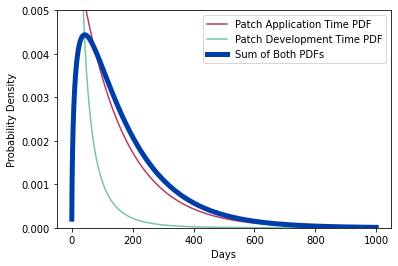

In [ ]:
plt.plot(big_grid, exp_pmf/delta, color=colors3[1], label='Patch Application Time PDF')
plt.plot(big_grid,pmf_weibull/delta, color=colors3[2], label='Patch Development Time PDF')
plt.plot(big_grid,conv[0:len(big_grid)]/delta, linewidth=5, color=colors3[0], label='Sum of Both PDFs')
plt.ylim([0,0.005])
plt.legend()
plt.xlabel('Days')
plt.ylabel('Probability Density')
plt.show()

Test to make sure I didn't screw it up.

Sample from the original Weibull and Exp distributions a bunch of times and add the random samples. The convolution should match to this brute-force monte carlo approach. Start with each of the distributions individual then test the convolution.

In [ ]:
num_mc_samples = 30000
dev_times = exp_dist.rvs(num_mc_samples)
apply_times = weibull.rvs(num_mc_samples)
mc_times = [dev_times[i]+apply_times[i] for i in range(len(dev_times))]

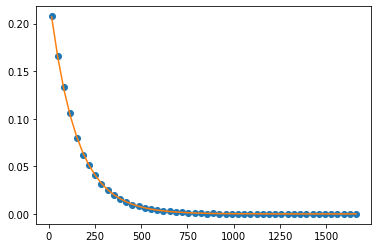

In [ ]:
ys,xs = np.histogram(dev_times,50)
plt.plot((xs[1::]+xs[0:-1])/2, ys/num_mc_samples,'o')
test_pmf = exp_dist.pdf((xs[1::]+xs[0:-1])/2) * (xs[1]-xs[0])
plt.plot((xs[1::]+xs[0:-1])/2, test_pmf)
plt.show()


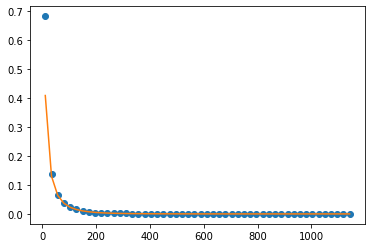

In [ ]:
ys,xs = np.histogram(apply_times,50)
plt.plot((xs[1::]+xs[0:-1])/2,ys/num_mc_samples, 'o')
test_pmf = weibull.pdf((xs[1::]+xs[0:-1])/2) * (xs[1]-xs[0])
plt.plot((xs[1::]+xs[0:-1])/2, test_pmf)

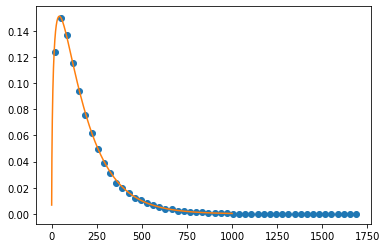

In [ ]:
ys,xs = np.histogram(mc_times,50)
plt.plot((xs[1::]+xs[0:-1])/2,ys/num_mc_samples,'o')
plt.plot(big_grid,(xs[1]-xs[0])*conv[0:len(big_grid)]/delta)
plt.show()

#Exploit Development

Get exploit development timelines as fit in this paper: https://roughan.info/papers/CVEAnalysis.pdf

They used a power law with exponential cutoff but didn't give the parameters so we have to back calculate them from their tables and graphs. Jerks.

Make a system of equations to find the three unknowns in an exponentially-capped power law then solve it.

In [ ]:
A = [[1,-1*np.log(10),-10],
     [1,-1*np.log(47),-47],
     [1,-1*np.log(431),-431]] #These are extracted from the tables
A = np.array(A)
B = np.array([[np.log(0.3)],[np.log(0.5)],[np.log(0.8)]]) #Also from the tables

eqn_params = np.linalg.inv(A).dot(B)
eqn_params[0] = np.exp(eqn_params[0])

print(eqn_params)

[[ 0.13538911]
 [-0.34896772]
 [ 0.00078983]]


Show the exponentially-capped power law

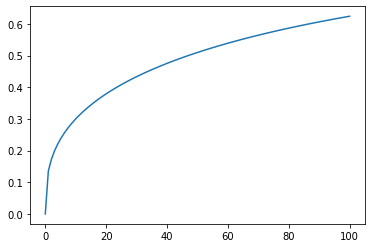

In [ ]:
ts = np.linspace(0,100,101)
exploit_developed_fraction = [eqn_params[0]*(t**(-1*eqn_params[1]))*np.exp(-eqn_params[2]*t) for t in ts]
plt.plot(ts,exploit_developed_fraction)
plt.show()

Compare this to the data from Lily's paper about private exploit developers. But first extract the data from her paper.

In [ ]:
extracted_ts = [10,20,30,40,50,60,70,80,90,100]
counts = [55,21,31,13,5,6,5,5,1,4]

In [ ]:
cum_counts = []
total = 0
for i in range(len(counts)):
  total += counts[i]
  cum_counts.append(total)

But there's a catch. Lily's paper doesn't include the vulnerabilities that never had an exploit developed. To compare to the exponentially-capped power law we'll need to add a free parameter to Lily's data for the number of vulns that didn't get exploits.

In [ ]:
def undeveloped_count_finder(t, normalize_count): #This just subtracts Lily's normalized real data from the ExploitDB fit. Should get zero if they match.
  return (np.array(cum_counts)/normalize_count) - eqn_params[0]*(t**(-1*eqn_params[1]))*np.exp(-eqn_params[2]*t)

In [ ]:
total_with_undeveloped, _ = curve_fit(undeveloped_count_finder, extracted_ts, np.zeros(len(counts)))
print(total_with_undeveloped)
print(total_with_undeveloped - cum_counts[-1] - 12) #The number of undeveloped vulns by subtracting the total extracted in 100 days and the 12 that were slower than that.

[237.70506733]
[79.70506733]


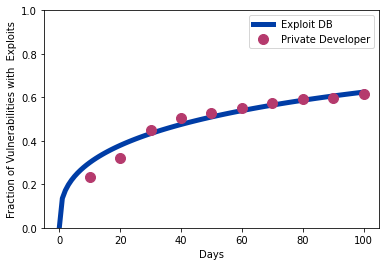

In [ ]:
#Convert to probability over time to compare to exponentially-capped power law

plt.plot(np.linspace(0,100,101), exploit_developed_fraction, '-', linewidth=5, color=colors2[0], label='Exploit DB')
plt.plot(extracted_ts, cum_counts/total_with_undeveloped[0], 'o', markersize=10, color=colors2[1], label='Private Developer')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Fraction of Vulnerabilities with  Exploits')
plt.ylim([0,1])
plt.show()

In [ ]:
ts = np.linspace(0,365,100)

exploit_developed_fraction = [eqn_params[0]*(t**(-1*eqn_params[1]))*np.exp(-eqn_params[2]*t) for t in ts]
exploit_unpatched_fraction = [exploit_developed_fraction[i] * (unpatched_fraction[i]) for i in range(len(ts))]

Set the parameter values for the effect of AI on patching-exploitation dynamics

In [ ]:
labels = ['No AI', 'Immediate Exploit Development', 'Immediate Patch Development', 'Immediate Developments and 5x Adoption', 'Immediate Development and 5x Adoption']
patch_dev_delays_on = [True, True, False, False, True]
patch_adopt_delays_on = [True, True, True, False, False]
exploit_delays_on = [True, False, True, False, True]
exploit_dev_As = [eqn_params[0]]
exploit_dev_alphas = [eqn_params[1]]
exploit_dev_betas = [eqn_params[2]]

But first, an aside, check that the shape of the curve makes sense given the patching and exploitation timelines

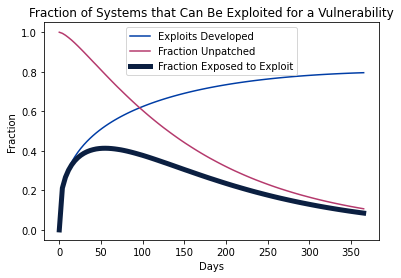

0.4131223930220253


In [ ]:
patch_dev_shape, patch_dev_scale = 0.572, 18.2
patch_adopt_shape = -100/np.log(0.5)
patch_adoption_speedup = 5

weibull = stats.weibull_min(c=patch_dev_shape, scale=patch_dev_scale)
pmf_weibull = patch_dev_scale * weibull.pdf(big_grid)*delta

exp_dist = stats.expon(loc=0, scale=patch_adopt_shape) 
exp_pmf = patch_adopt_shape * exp_dist.pdf(big_grid)*delta

conv = signal.fftconvolve(exp_pmf,0.22*pmf_weibull,'full')
patch_delay_pdf = conv[0:len(exp_pmf)]/sum(conv)

total, unpatched_fraction = 0, []
for j in range(len(exp_pmf)):
  total += patch_delay_pdf[j]
  unpatched_fraction.append(total)

exploit_developed_fraction = [eqn_params[0]*(t**(-1*eqn_params[1]))*np.exp(-eqn_params[2]*t) for t in ts]

unpatched_fraction_matched_x_axis = [1-unpatched_fraction[int(10*round(val+delta,1))] for val in ts]
exploit_unpatched_fraction = [unpatched_fraction_matched_x_axis[i] * exploit_developed_fraction[i] for i in range(len(ts))]
plt.plot(ts, exploit_developed_fraction, color=colors5[1], label='Exploits Developed')
plt.plot(ts, unpatched_fraction_matched_x_axis, color=colors5[2], label='Fraction Unpatched')
plt.plot(ts, exploit_unpatched_fraction, color=colors5[0], linewidth=5, label='Fraction Exposed to Exploit')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Fraction')
plt.title('Fraction of Systems that Can Be Exploited for a Vulnerability')
plt.show()

print(np.max(exploit_unpatched_fraction))

In [ ]:
print(max(exploit_unpatched_fraction))
print(np.argmax(exploit_unpatched_fraction) * 365/len(exploit_unpatched_fraction))
print(exploit_unpatched_fraction[-1])

[0.41312239]
54.75
[0.08504102]


Now show the graphs for the parameters set above

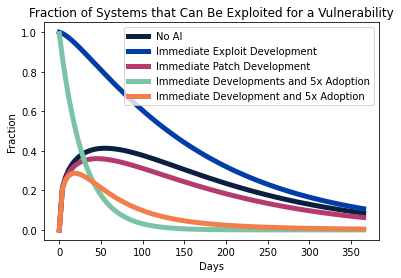

In [ ]:
patch_dev_shape, patch_dev_scale = 0.572, 18.2
patch_adopt_shape = -100/np.log(0.5)
patch_adoption_speedup = 5

for i in range(len(labels)):
  if patch_dev_delays_on[i]:
    weibull = stats.weibull_min(c=patch_dev_shape, scale=patch_dev_scale)
    pmf_weibull = patch_dev_scale * weibull.pdf(big_grid)*delta
  else:
    pmf_weibull = [0 for val in big_grid]
    pmf_weibull[0] = len(big_grid)

  if patch_adopt_delays_on[i]:
    exp_dist = stats.expon(loc=0, scale=patch_adopt_shape) 
    exp_pmf = patch_adopt_shape * exp_dist.pdf(big_grid)*delta
  else:
    exp_dist = stats.expon(loc=0, scale=patch_adopt_shape/patch_adoption_speedup) 
    exp_pmf = (patch_adopt_shape * exp_dist.pdf(big_grid)*delta)

  conv = signal.fftconvolve(exp_pmf,pmf_weibull,'full')
  patch_delay_pdf = conv[0:len(exp_pmf)]/sum(conv)

  total, unpatched_fraction = 0, []
  for j in range(len(exp_pmf)):
    total += patch_delay_pdf[j]
    unpatched_fraction.append(total)

  if exploit_delays_on[i]==True:
    exploit_developed_fraction = [eqn_params[0]*(t**(-1*eqn_params[1]))*np.exp(-eqn_params[2]*t) for t in ts]
  else:
    exploit_developed_fraction = [1 for t in ts]

  unpatched_fraction_matched_x_axis = [1-unpatched_fraction[int(10*round(val+delta,1))] for val in ts]
  exploit_unpatched_fraction = [unpatched_fraction_matched_x_axis[i] * exploit_developed_fraction[i] for i in range(len(ts))]
  plt.plot(ts, exploit_unpatched_fraction, color=colors5[i], linewidth=5, label=labels[i])
plt.legend()
plt.xlabel('Days')
plt.ylabel('Fraction')
plt.title('Fraction of Systems that Can Be Exploited for a Vulnerability')
plt.show()

In [ ]:
labels = ['No AI', 'Immediate Patch Development', '5x Adoption Speedup', 'Immediate Patch Dev and 5x Adoption']
patch_dev_delays_on = [True, False, True, False]
patch_adopt_delays_on = [True, True, False, False]
exploit_delays_on = [True, True, True, True]
exploit_dev_As = [eqn_params[0]]
exploit_dev_alphas = [eqn_params[1]]
exploit_dev_betas = [eqn_params[2]]

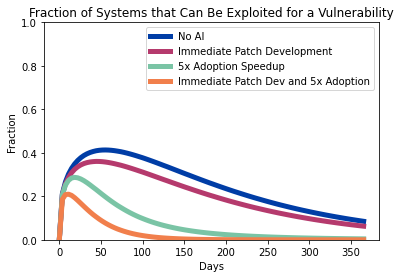

In [ ]:
patch_dev_shape, patch_dev_scale = 0.572, 18.2
patch_adopt_shape = -100/np.log(0.5)
patch_adoption_speedup = 5

for i in range(len(labels)):
  if patch_dev_delays_on[i]:
    weibull = stats.weibull_min(c=patch_dev_shape, scale=patch_dev_scale)
    pmf_weibull = patch_dev_scale * weibull.pdf(big_grid)*delta
  else:
    pmf_weibull = [0 for val in big_grid]
    pmf_weibull[0] = len(big_grid)

  if patch_adopt_delays_on[i]:
    exp_dist = stats.expon(loc=0, scale=patch_adopt_shape) 
    exp_pmf = patch_adopt_shape * exp_dist.pdf(big_grid)*delta
  else:
    exp_dist = stats.expon(loc=0, scale=patch_adopt_shape/patch_adoption_speedup) 
    exp_pmf = (patch_adopt_shape * exp_dist.pdf(big_grid)*delta)

  conv = signal.fftconvolve(exp_pmf,pmf_weibull,'full')
  patch_delay_pdf = conv[0:len(exp_pmf)]/sum(conv)

  total, unpatched_fraction = 0, []
  for j in range(len(exp_pmf)):
    total += patch_delay_pdf[j]
    unpatched_fraction.append(total)

  if exploit_delays_on[i]==True:
    exploit_developed_fraction = [eqn_params[0]*(t**(-1*eqn_params[1]))*np.exp(-eqn_params[2]*t) for t in ts]
  else:
    exploit_developed_fraction = [1 for t in ts]

  unpatched_fraction_matched_x_axis = [1-unpatched_fraction[int(10*round(val+delta,1))] for val in ts]
  exploit_unpatched_fraction = [unpatched_fraction_matched_x_axis[i] * exploit_developed_fraction[i] for i in range(len(ts))]
  plt.plot(ts, exploit_unpatched_fraction, color=colors4[i], linewidth=5, label=labels[i])
plt.legend()
plt.xlabel('Days')
plt.ylabel('Fraction')
plt.title('Fraction of Systems that Can Be Exploited for a Vulnerability')
plt.ylim([0,1])
plt.show()

In [ ]:
labels = ['No AI', 'Immediate Exploit Development', 'Immediate Exploit and Patch Development', 'Immediate Exploits and 5x Adoption', 'Immediate Developments and 5x Adoption']
patch_dev_delays_on = [True, True, False, True, False]
patch_adopt_delays_on = [True, True, True, False, False]
exploit_delays_on = [True, False, False, False, False]
exploit_dev_As = [eqn_params[0]]
exploit_dev_alphas = [eqn_params[1]]
exploit_dev_betas = [eqn_params[2]]

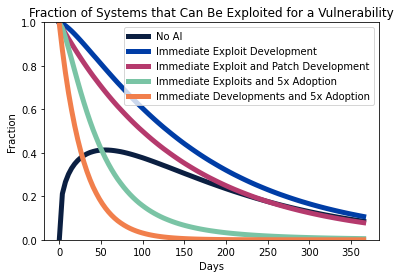

In [ ]:
patch_dev_shape, patch_dev_scale = 0.572, 18.2
patch_adopt_shape = -100/np.log(0.5)
patch_adoption_speedup = 5

for i in range(len(labels)):
  if patch_dev_delays_on[i]:
    weibull = stats.weibull_min(c=patch_dev_shape, scale=patch_dev_scale)
    pmf_weibull = patch_dev_scale * weibull.pdf(big_grid)*delta
  else:
    pmf_weibull = [0 for val in big_grid]
    pmf_weibull[0] = len(big_grid)

  if patch_adopt_delays_on[i]:
    exp_dist = stats.expon(loc=0, scale=patch_adopt_shape) 
    exp_pmf = patch_adopt_shape * exp_dist.pdf(big_grid)*delta
  else:
    exp_dist = stats.expon(loc=0, scale=patch_adopt_shape/patch_adoption_speedup) 
    exp_pmf = (patch_adopt_shape * exp_dist.pdf(big_grid)*delta)

  conv = signal.fftconvolve(exp_pmf,pmf_weibull,'full')
  patch_delay_pdf = conv[0:len(exp_pmf)]/sum(conv)

  total, unpatched_fraction = 0, []
  for j in range(len(exp_pmf)):
    total += patch_delay_pdf[j]
    unpatched_fraction.append(total)

  if exploit_delays_on[i]==True:
    exploit_developed_fraction = [eqn_params[0]*(t**(-1*eqn_params[1]))*np.exp(-eqn_params[2]*t) for t in ts]
  else:
    exploit_developed_fraction = [1 for t in ts]

  unpatched_fraction_matched_x_axis = [1-unpatched_fraction[int(10*round(val+delta,1))] for val in ts]
  exploit_unpatched_fraction = [unpatched_fraction_matched_x_axis[i] * exploit_developed_fraction[i] for i in range(len(ts))]
  plt.plot(ts, exploit_unpatched_fraction, color=colors5[i], linewidth=5, label=labels[i])
plt.legend()
plt.xlabel('Days')
plt.ylabel('Fraction')
plt.title('Fraction of Systems that Can Be Exploited for a Vulnerability')
plt.ylim([0,1])
plt.show()